# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


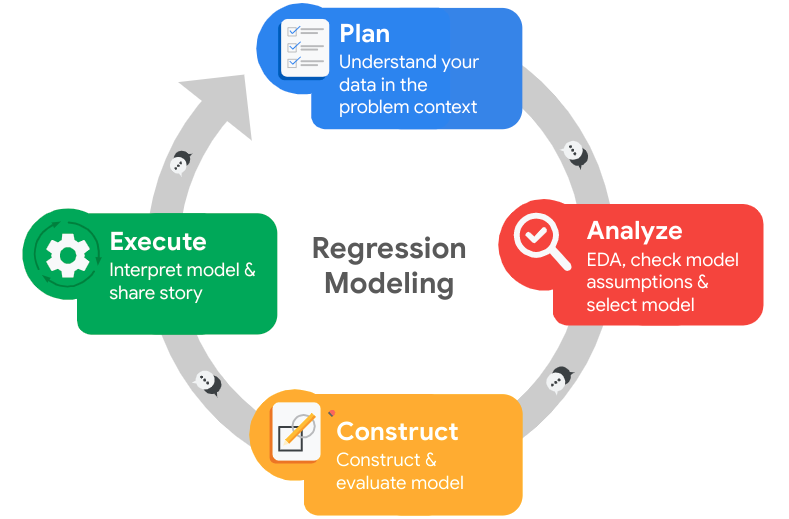

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing, model_selection, metrics, ensemble


import xgboost as xgb



import statsmodels.api as sm


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [6]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("../data/raw/salifort_hrdata_raw.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
print(df.head())
print()
print(df.isnull().sum())



   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df.info())
print()
print('Duplicates:', df.duplicated().sum())
print()
print('No Null Values but we have 3008 duplicates')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Duplicates: 3008

No Null Values but we have 3008 duplicates


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe(include = "all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
### YOUR CODE HERE ###

df.columns = df.columns.str.lower()

In [10]:
# Rename columns as needed
### YOUR CODE HERE ###

df.rename(columns = {
    'last_evaluation' : 'eval_score',
    'number_project' : 'total_projects',
    'average_montly_hours' : 'monthly_avg_hours',
    'time_spend_company' : 'years_in_company',
    'left' : 'left_company', 
    'promotion_last_5years' : 'promotion', 
}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###

df.head()

,satisfaction_level,eval_score,total_projects,monthly_avg_hours,years_in_company,work_accident,left_company,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###

# Done above and there no missing values 

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###

# Checked and there are 3008 duplicates 

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

dupes = df[df.duplicated()]

dupes.head()

,satisfaction_level,eval_score,total_projects,monthly_avg_hours,years_in_company,work_accident,left_company,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

df.shape

# duplicates have been dropped as indicated by the shape of the new df

(11991, 10)

### Check outliers

Check for outliers in the data.

<Axes: ylabel='years_in_company'>

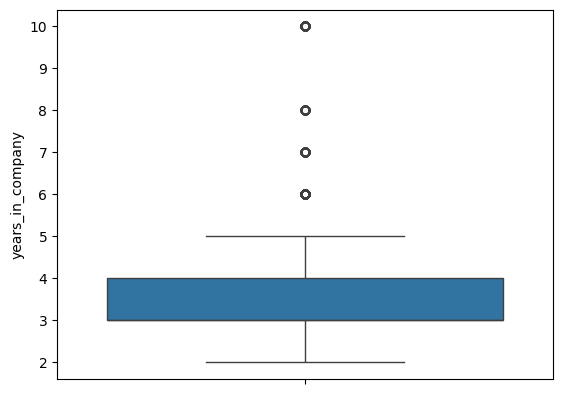

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df['years_in_company'])

# several outliers around 6-8 years and another on at 10 years 

AxesSubplot(0.125,0.125;0.775x0.755)
0.7166825118839051


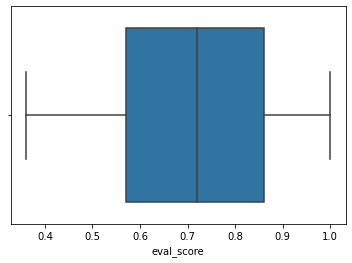

In [12]:

print(sns.boxplot(df['eval_score']))
print(df['eval_score'].mean())

AxesSubplot(0.125,0.125;0.775x0.755)


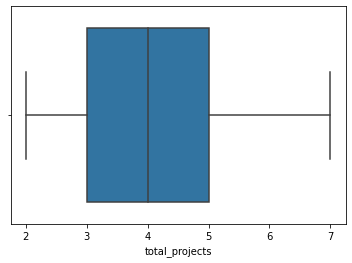

In [13]:
print(sns.boxplot(df['total_projects']))


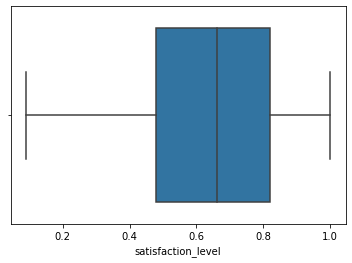

In [14]:
sns.boxplot(df['satisfaction_level'])

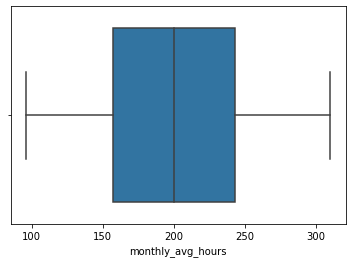

In [15]:
sns.boxplot(df['monthly_avg_hours'])


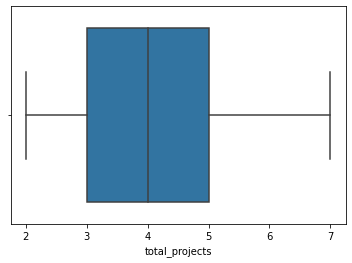

In [16]:
sns.boxplot(df['total_projects'])

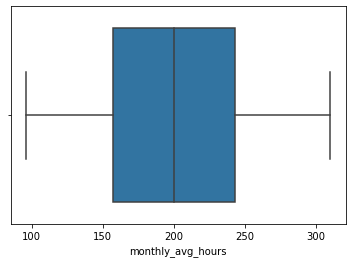

In [17]:
sns.boxplot(df['monthly_avg_hours'])

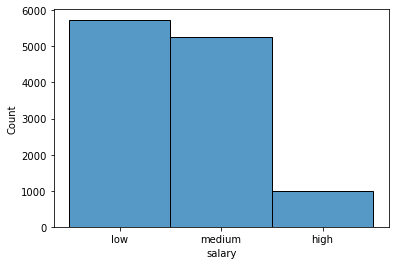

In [18]:
sns.histplot(df['salary'])

Axes(0.125,0.11;0.775x0.77)
department
sales          27.011926
technical      18.714036
support        15.186390
IT              8.139438
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: proportion, dtype: float64


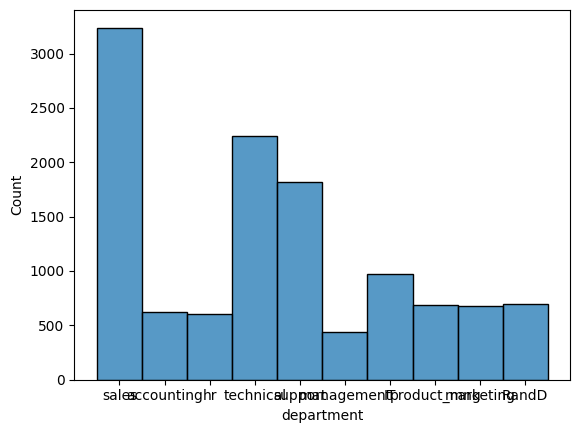

In [14]:
print(sns.histplot(df['department']))
print(df['department'].value_counts(normalize = True) * 100)

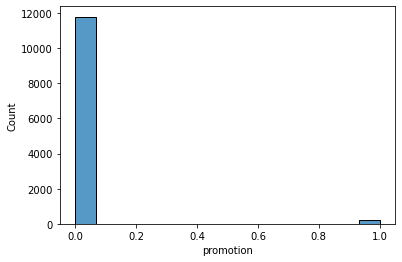

In [20]:
sns.histplot(df['promotion'])

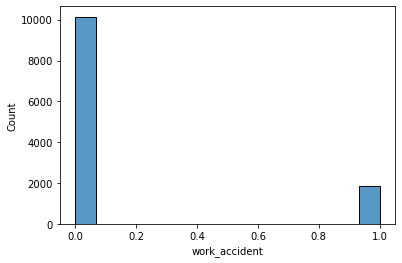

In [21]:
sns.histplot(df['work_accident'])

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
## Define Q1, Q3 , Interquartile Range(IQR) and then create the outliers df

Q1 = df['years_in_company'].quantile(0.25)
Q3 = df['years_in_company'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['years_in_company'] < Q1 - 1.5 * IQR) | (df['years_in_company'] > Q3 + 1.5 * IQR)]

# Find the amount of rows that are outliers 

outliers.shape

# 824 outliers exist in the "years_in_company" column

(824, 10)

In [23]:
# Our team created a boxplot for all continous features and found that 
# "years_in_company" is the only feature with outliers 
# This piece of information is handy for the model selection stage


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

A. What did you observe about the relationships between variables?

- Despite the various unique factors pertaining to each employee, most people inidivduals that were surveyed are still with the company; (83.4%)
- The Average satisfaction rate is 62%
- The most satisfied group of employees are the ones working an avg of 200 hours per month; 50 per week. 
- With the exception of HR and Support departments, the avg tenure for each department is 3-4 years.
- Evaluation scores across each department is even
- Evalution score in individuals that left the company have a wider variety versus those who are still working witht Salifort Motors. This might be wroth looking into. Low eval score can lead to disciplinary actions and even getting fired. On the other hand, high eval scores can be indicative of individuals getting promotions from outside the original employer. 
- Satisfaction level across salary tiers are even

B. What do you observe about the distributions in the data?

-years_in_company contains many outliers. Other features dont. 
-The distribution from most features is pretty even. The exceptions are promotion, work accident and years in company. We might consider removing 2 or all features from the model for logistic regression. Our team will advise on that 

C. What transformations did you make with your data? Why did you chose to make those decisions?

- Some simple, yet powerful changes were made to the raw data. Starting with making each feature name show as a lowercase string. Additionally, we went ahead and renamed the columns to make the data give more preciase names. Before performing any type of feature engineering, our team handled null values and duplicated data. 

- In regards to feature engineeering, our team discussed and brainstored several features that can be derived from the raw data. (A. Difference between eval and satisfaction level, B. Project Rate Per Year, C. Binned Tenure, D. Employee Sat Level vs Department Average, E. No Promo and Low Salary Match, F. Overworked, G. One Hot Encode)

D. What are some purposes of EDA before constructing a predictive model?

- EDA helps us format, clean and prepare our data for feature engineering and a more accurate preditive model.
- EDA can also help us uncover patterns in our data so that the project model/s can be better tuned to the objective our stakeholders have. 

E. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

- I find myself using https://www.perplexity.ai/ a lot. It is the best interface to create an interactive deep search project space tailored to my needs. 


F. Do you have any ethical considerations in this stage?

- I do not. All Pesonal Indentifiable information has been omitted and no protected groups are targeted or mentioned in the raw data. -NO further information was provided to AGE Solutions by stakeholders. 


[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left_company'].value_counts())

print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left_company'].value_counts(normalize = True)*100)

left_company
0    10000
1     1991
Name: count, dtype: int64

left_company
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  11991 non-null  float64
 1   eval_score          11991 non-null  float64
 2   total_projects      11991 non-null  int64  
 3   monthly_avg_hours   11991 non-null  int64  
 4   years_in_company    11991 non-null  int64  
 5   work_accident       11991 non-null  int64  
 6   left_company        11991 non-null  int64  
 7   promotion           11991 non-null  int64  
 8   department          11991 non-null  object 
 9   salary              11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


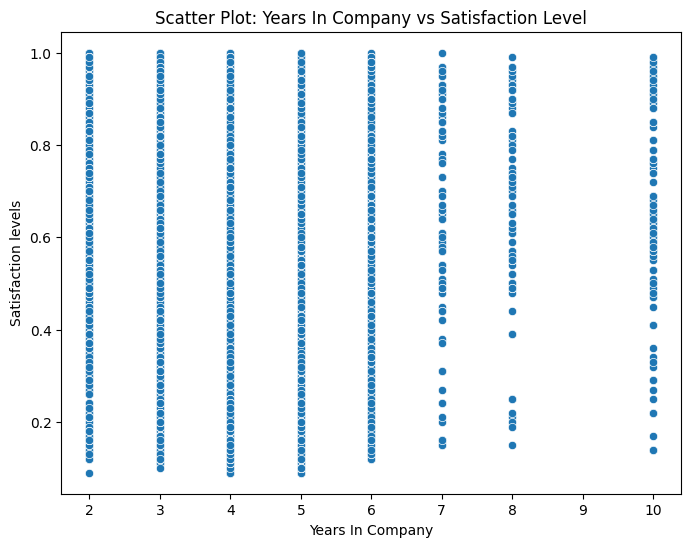

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###


plt.figure(figsize=(8,6))
sns.scatterplot(x='years_in_company', y='satisfaction_level', data=df)
plt.title('Scatter Plot: Years In Company vs Satisfaction Level')
plt.xlabel('Years In Company')
plt.ylabel('Satisfaction levels')
plt.show()

In [19]:
# employees that have been with the company for 4-6 years have wider range of "satisfaction_level". 
#The satisfaction_level ranges from 0.2 - 0.85 in this group.
# the average satisfaction level for each group ranges from 0.62 - 0.75 
# Groups in years 4-6 have a wider central 50% range of satisfaction levels 
# Years 2-3 & 7-10 have tightly clustered satisfaction levels and are at or above the 0.50 marker.



df['satisfaction_level'].describe()


count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

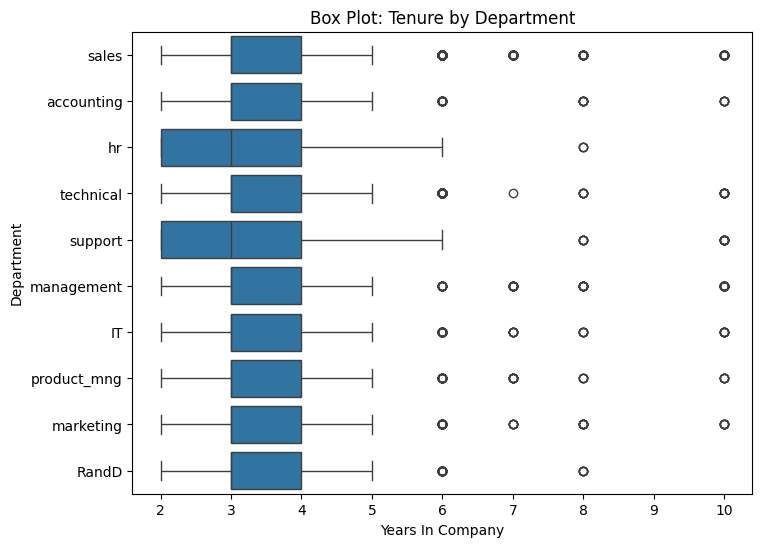

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='years_in_company', y='department', data=df)
plt.title('Box Plot: Tenure by Department')
plt.xlabel('Years In Company')
plt.ylabel('Department')
plt.show()


In [21]:
# Years in company by department Results:

# 8 out of 10 departments have their central 50% of employees tenured between 3-4 years
# HR and Support have the central 50% of emloyees tenured between 2-4 years


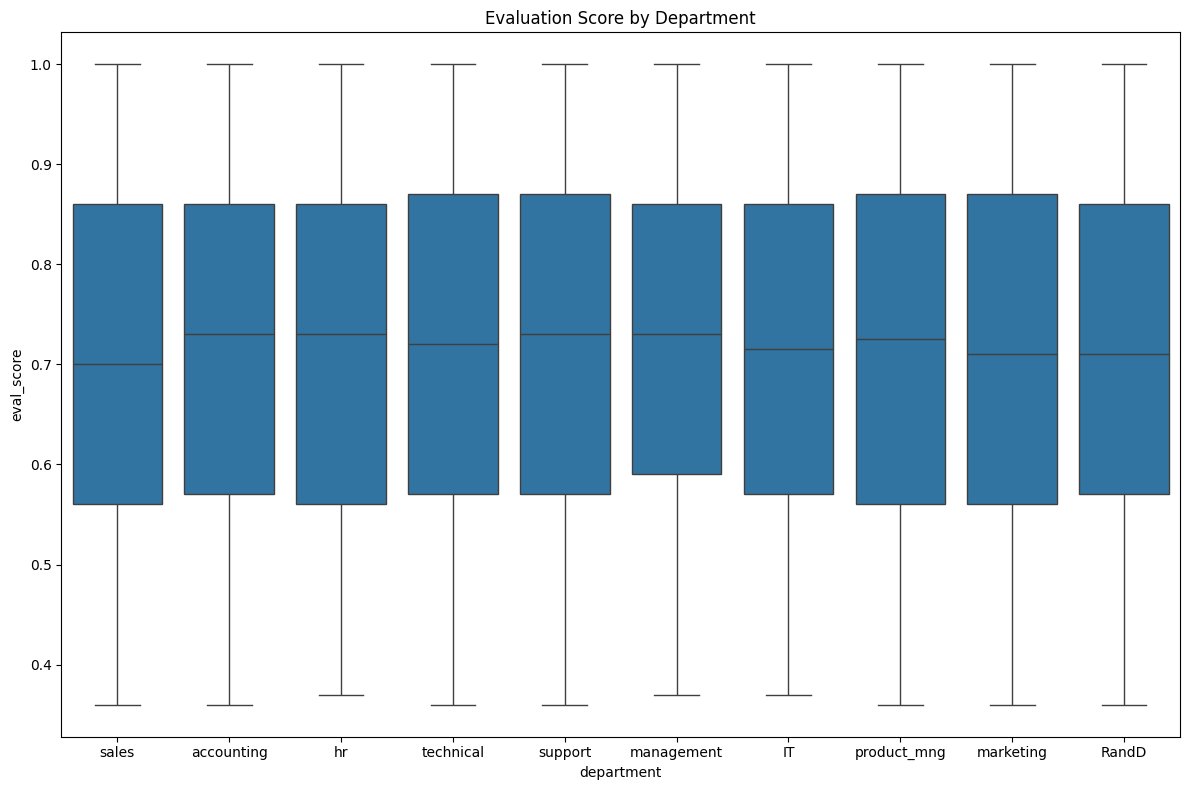

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###


plt.figure(figsize=(12, 8))  # Make the plot bigger

sns.boxplot(data=df, x='department', y='eval_score')  # Horizontal boxplot

plt.title('Evaluation Score by Department')
plt.tight_layout()  # Adjusts plot for a clean fit
plt.show()


In [23]:
# Eval core by Department: 

# The evaluiation scores appear to be pretty even across all departments 
# The eval score for the central 50% of the employees for each department is between 0.57 - 0.86

df['eval_score'].describe()

count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: eval_score, dtype: float64

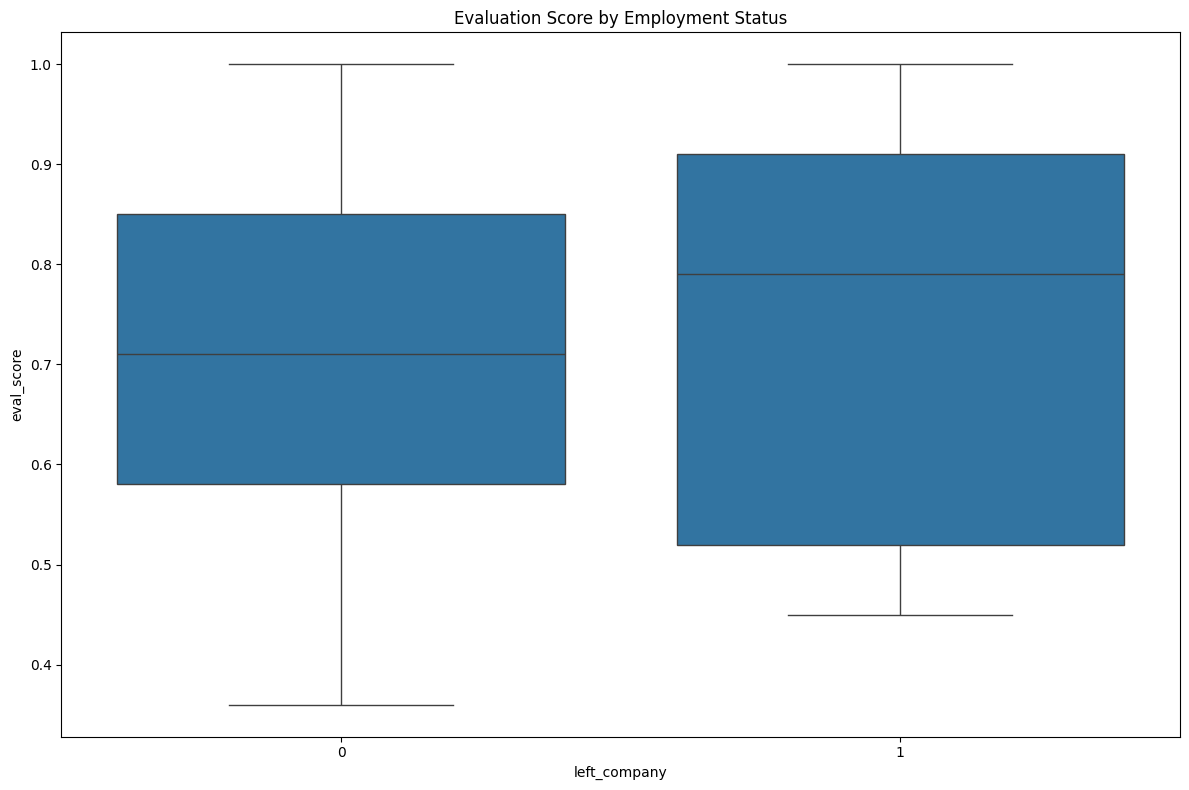

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###


plt.figure(figsize=(12, 8))  # Make the plot bigger

sns.boxplot(data=df, x='left_company', y='eval_score')  # Horizontal boxplot

plt.title('Evaluation Score by Employment Status')
plt.tight_layout()  # Adjusts plot for a clean fit
plt.show()


In [25]:
df[df['left_company'] == 0]['eval_score'].mean()


np.float64(0.715667)

In [26]:
# Eval Score by Employment Status 
# o = still in company 
# 1 = left the company 

# The boxplot shows a wider variation in evaluation scores for individuals that left the company
# might performance and eval_scores be an indicator of employee retention?

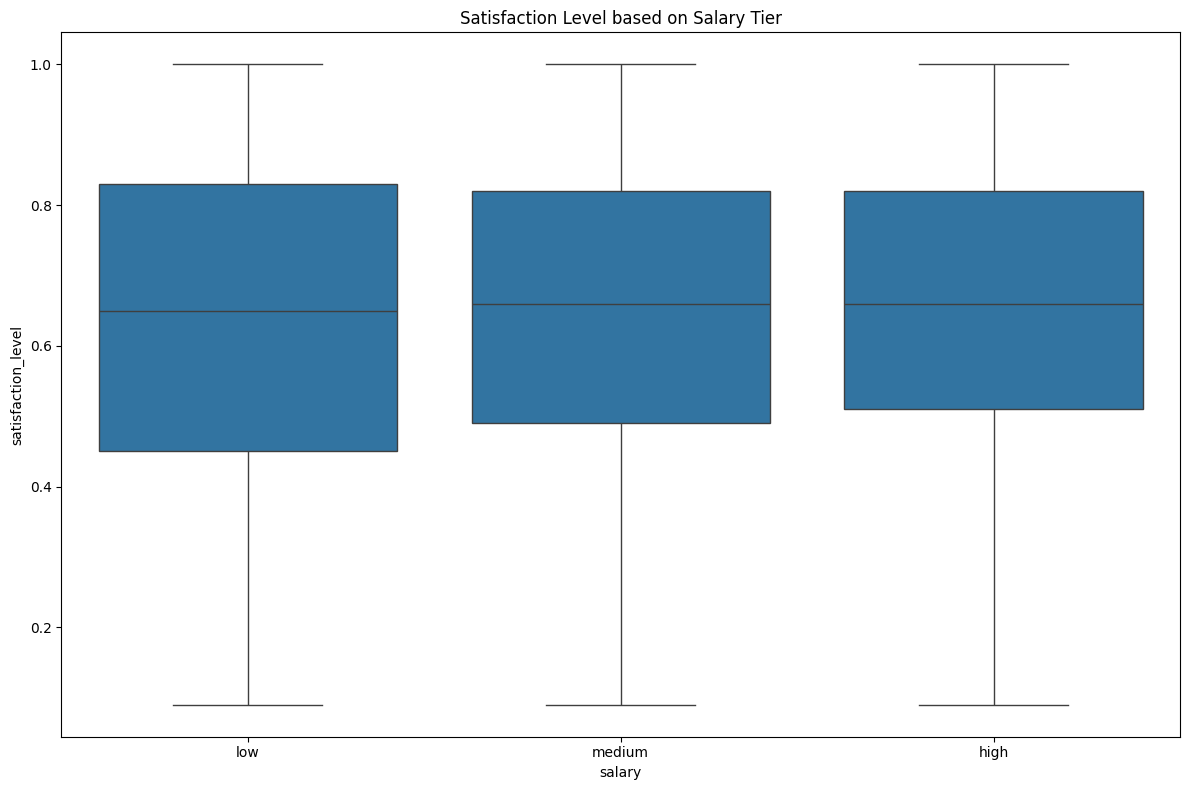

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###


plt.figure(figsize=(12, 8))  # Make the plot bigger

sns.boxplot(data=df, x='salary', y='satisfaction_level')  # Horizontal boxplot

plt.title('Satisfaction Level based on Salary Tier')
plt.tight_layout()  # Adjusts plot for a clean fit
plt.show()

In [36]:
# Satisfaction Level Based on Salary Tier Results:

# Satisfaction level is even across the different salary tiers 


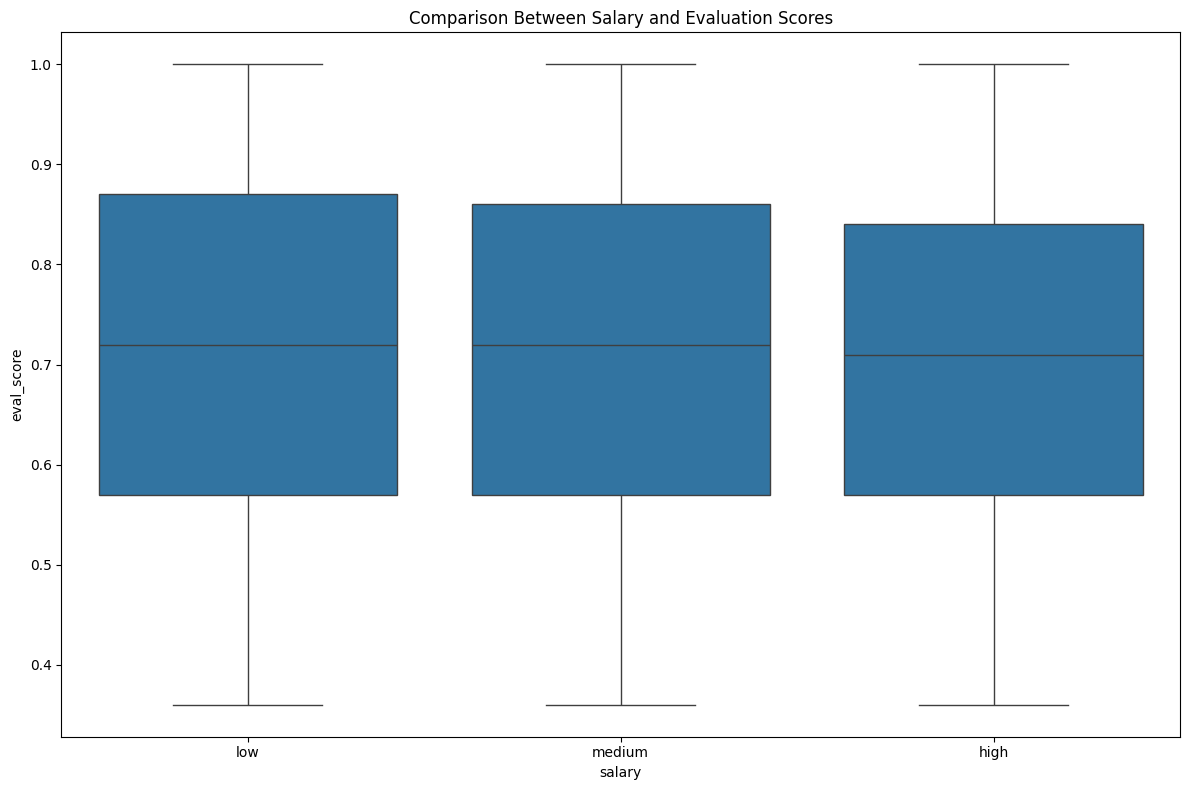

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(12, 8))  # Make the plot bigger

sns.boxplot(data=df, x='salary', y='eval_score')  # Horizontal boxplot

plt.title('Comparison Between Salary and Evaluation Scores')
plt.tight_layout()  # Adjusts plot for a clean fit
plt.show()

In [29]:
# Comparison Between Salary Tier and Eval Scores Results: 

# Evaluation Scores remains consistent throughout each salry tier.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  11991 non-null  float64
 1   eval_score          11991 non-null  float64
 2   total_projects      11991 non-null  int64  
 3   monthly_avg_hours   11991 non-null  int64  
 4   years_in_company    11991 non-null  int64  
 5   work_accident       11991 non-null  int64  
 6   left_company        11991 non-null  int64  
 7   promotion           11991 non-null  int64  
 8   department          11991 non-null  object 
 9   salary              11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


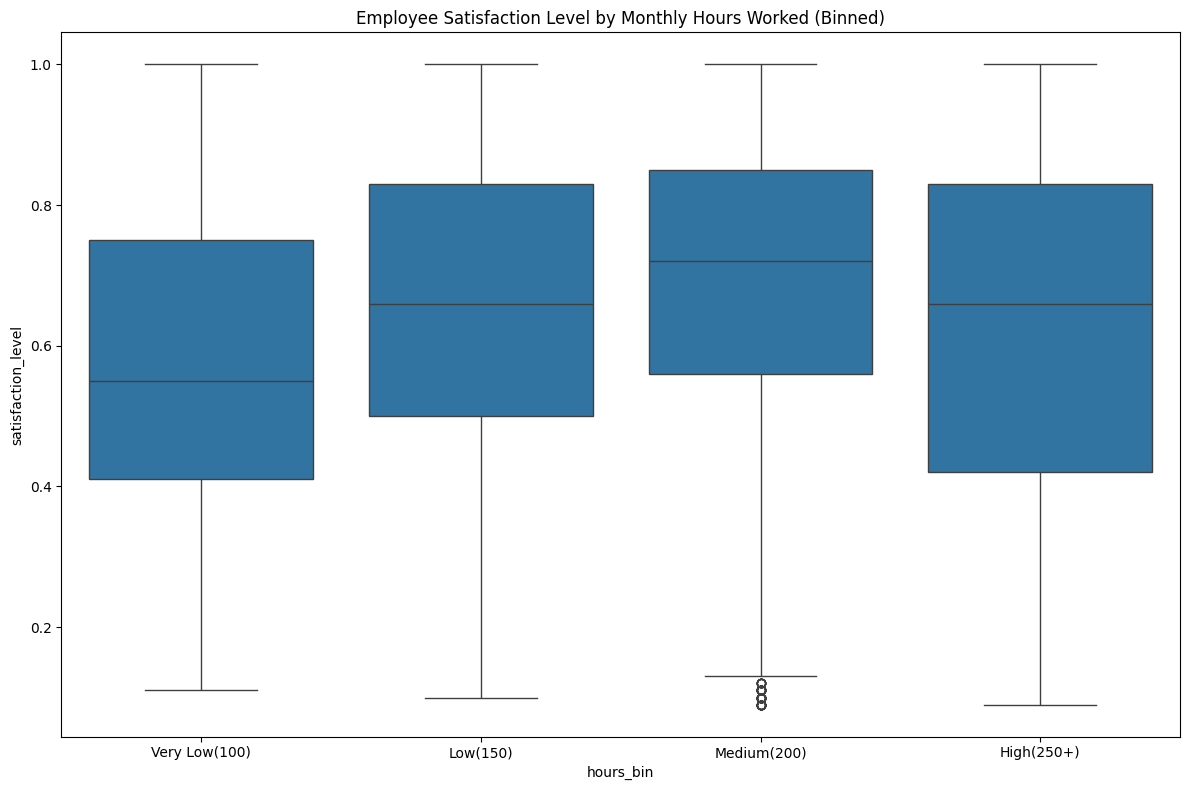

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###


df['hours_bin'] = pd.cut(df['monthly_avg_hours'], bins=[100, 150, 200, 250, 300], labels=['Very Low(100)', 'Low(150)', 'Medium(200)', 'High(250+)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='hours_bin', y='satisfaction_level')

plt.title('Employee Satisfaction Level by Monthly Hours Worked (Binned)')
plt.tight_layout()
plt.show()

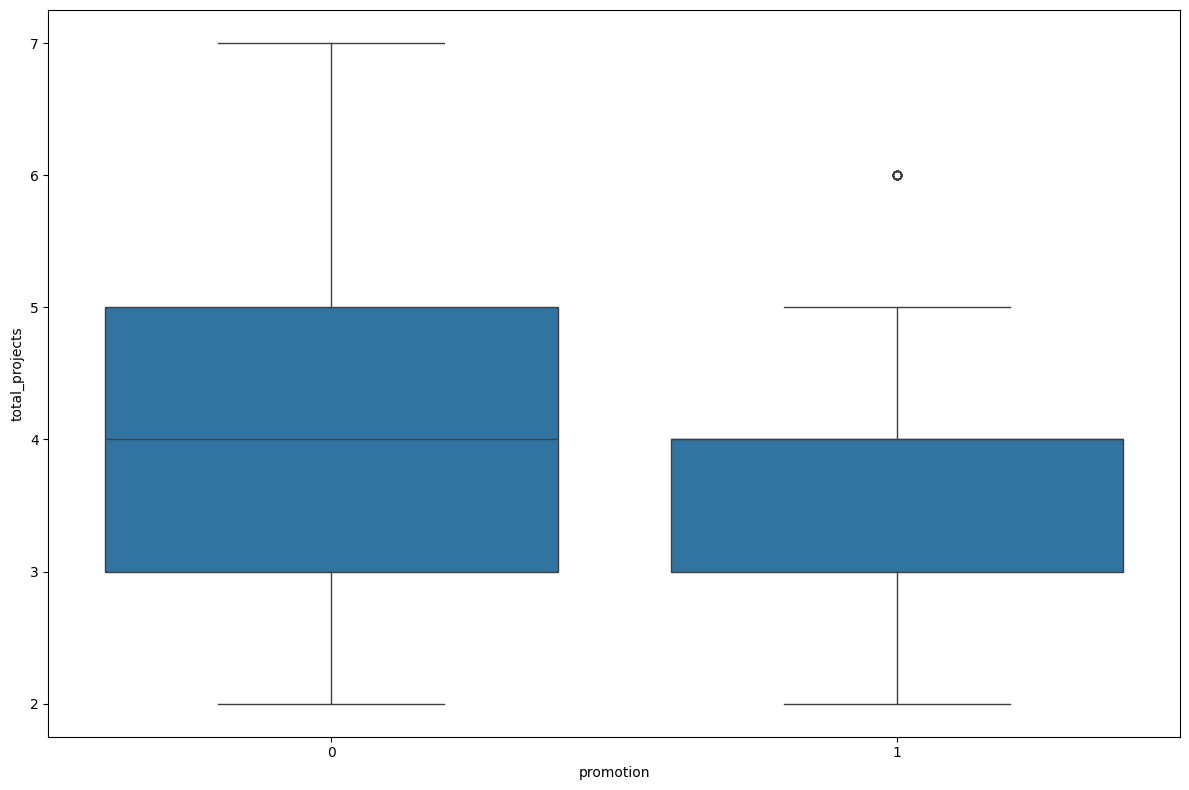

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(12, 8))  # Make the plot bigger

sns.boxplot(data=df, x='promotion', y='total_projects')  # Horizontal boxplot

plt.title('')
plt.tight_layout()  # Adjusts plot for a clean fit
plt.show()

In [33]:
df['hours_bin'].value_counts()

hours_bin
Low(150)         3717
Medium(200)      3536
High(250+)       2318
Very Low(100)    2261
Name: count, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   satisfaction_level  11991 non-null  float64 
 1   eval_score          11991 non-null  float64 
 2   total_projects      11991 non-null  int64   
 3   monthly_avg_hours   11991 non-null  int64   
 4   years_in_company    11991 non-null  int64   
 5   work_accident       11991 non-null  int64   
 6   left_company        11991 non-null  int64   
 7   promotion           11991 non-null  int64   
 8   department          11991 non-null  object  
 9   salary              11991 non-null  object  
 10  hours_bin           11832 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [35]:
#Feature Engineering 
# A positive value indicates that the employee feels more satisfied than their evaluation suggests.
# A negative value indicates the employee may feel less satisfied than their performance rating.

df['satisfaction_eval_diff'] = df['satisfaction_level']-df['eval_score']

# Excessive projects per year can lead to burnout 
# We might be able to engineer a new column based on yearlyprojectrate and the salary for the employee

df['yearly_project_rate'] = df['total_projects'] / df['years_in_company']


# Create a new columnm where 'years_in_company' is put into bins and categorized(grouped)

df['tenure_bin'] = pd.cut(
    df['years_in_company'],
    bins=[0, 2, 5, df['years_in_company'].max()],
    labels=['0-2', '3-5', '6+'],
    right=True,
    include_lowest=True
)
    
# Calculate department average satisfaction
dept_avg_satisfaction = df.groupby('department')['satisfaction_level'].transform('mean')

# Calculate relative satisfaction as difference from department average
df['rel_satisfaction'] = df['satisfaction_level'] - dept_avg_satisfaction

# Create a column that returns a boolean for an employee who has a low salary and has had no promotion 
df['low_salary_no_promotion'] = ((df['salary'] == 'low') & (df['promotion'] == 0)).astype(int)

# Create a column that indicates whether or not an employee has been overworked by calculating the 75th percentile 

outwork_threshold = df['monthly_avg_hours'].quantile(0.75)

df['overworked'] = (df['monthly_avg_hours'] > outwork_threshold).astype(int)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   satisfaction_level       11991 non-null  float64 
 1   eval_score               11991 non-null  float64 
 2   total_projects           11991 non-null  int64   
 3   monthly_avg_hours        11991 non-null  int64   
 4   years_in_company         11991 non-null  int64   
 5   work_accident            11991 non-null  int64   
 6   left_company             11991 non-null  int64   
 7   promotion                11991 non-null  int64   
 8   department               11991 non-null  object  
 9   salary                   11991 non-null  object  
 10  hours_bin                11832 non-null  category
 11  satisfaction_eval_diff   11991 non-null  float64 
 12  yearly_project_rate      11991 non-null  float64 
 13  tenure_bin               11991 non-null  category
 14  rel_satisfa

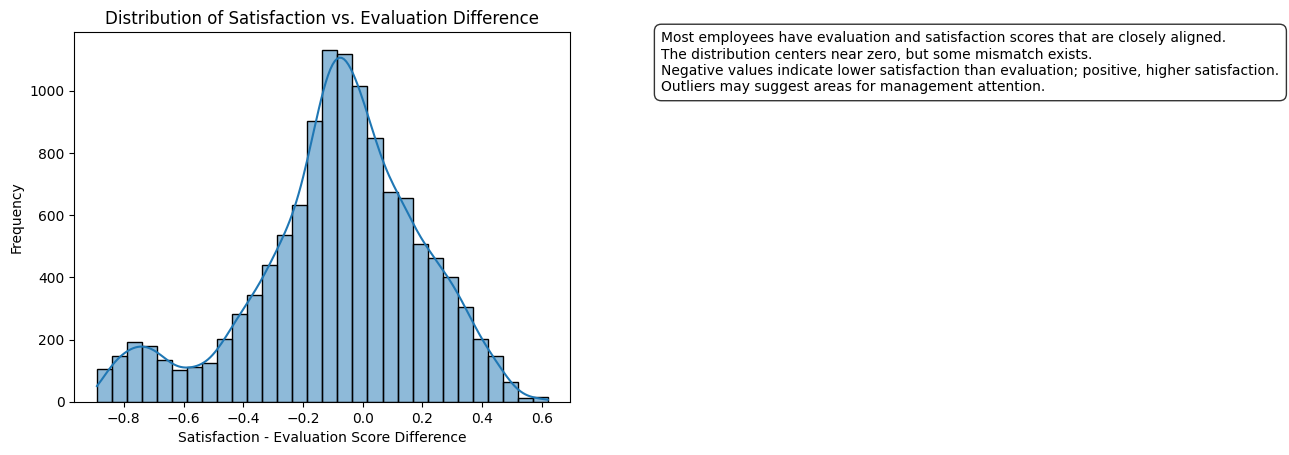

In [37]:
##Feature Engineering Visuals 

# Get a distribution plot of the difference between eval score and satisfaction level 

sns.histplot(df['satisfaction_eval_diff'], bins=30, kde=True)
plt.title('Distribution of Satisfaction vs. Evaluation Difference')
plt.xlabel('Satisfaction - Evaluation Score Difference')
plt.ylabel('Frequency')

# Add explanatory footnotes using plt.text()
plt.text(
    1.0,         # x position (move to the side)
    1000,        # y position (top of plot)
    'Most employees have evaluation and satisfaction scores that are closely aligned.\n'
    'The distribution centers near zero, but some mismatch exists.\n'
    'Negative values indicate lower satisfaction than evaluation; positive, higher satisfaction.\n'
    'Outliers may suggest areas for management attention.',
    fontsize=10,
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

plt.show()


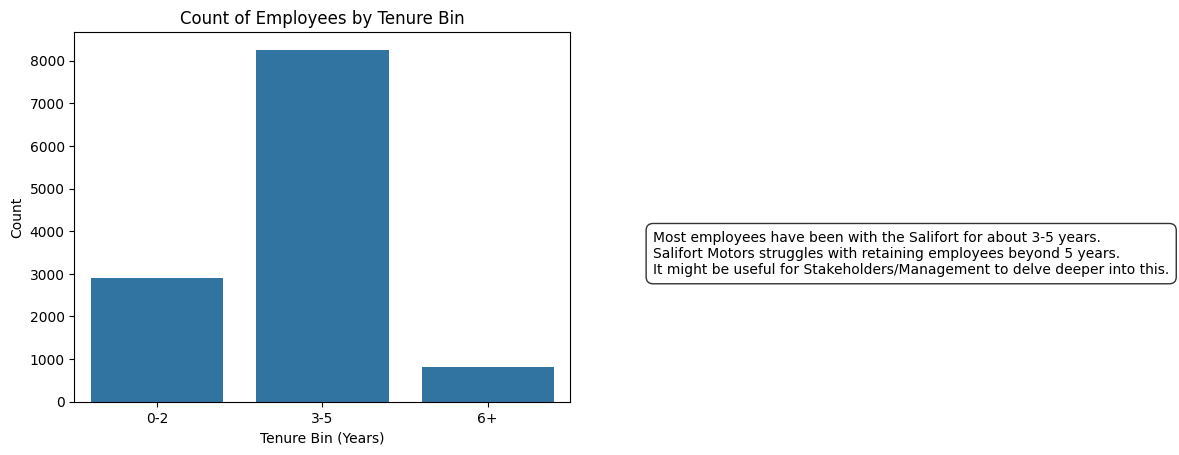

In [39]:
# Creating a countplot of Employees and Their Tenure(Bins)

sns.countplot(data=df, x='tenure_bin')
plt.title('Count of Employees by Tenure Bin')
plt.xlabel('Tenure Bin (Years)')
plt.ylabel('Count')



# Add explanatory footnotes using plt.text()
plt.text(
    3.0,         # x position (move to the side)
    3000,        # y position (top of plot)
    'Most employees have been with the Salifort for about 3-5 years.\n'
    'Salifort Motors struggles with retaining employees beyond 5 years.\n'
    'It might be useful for Stakeholders/Management to delve deeper into this.',
    fontsize=10,
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

plt.show()


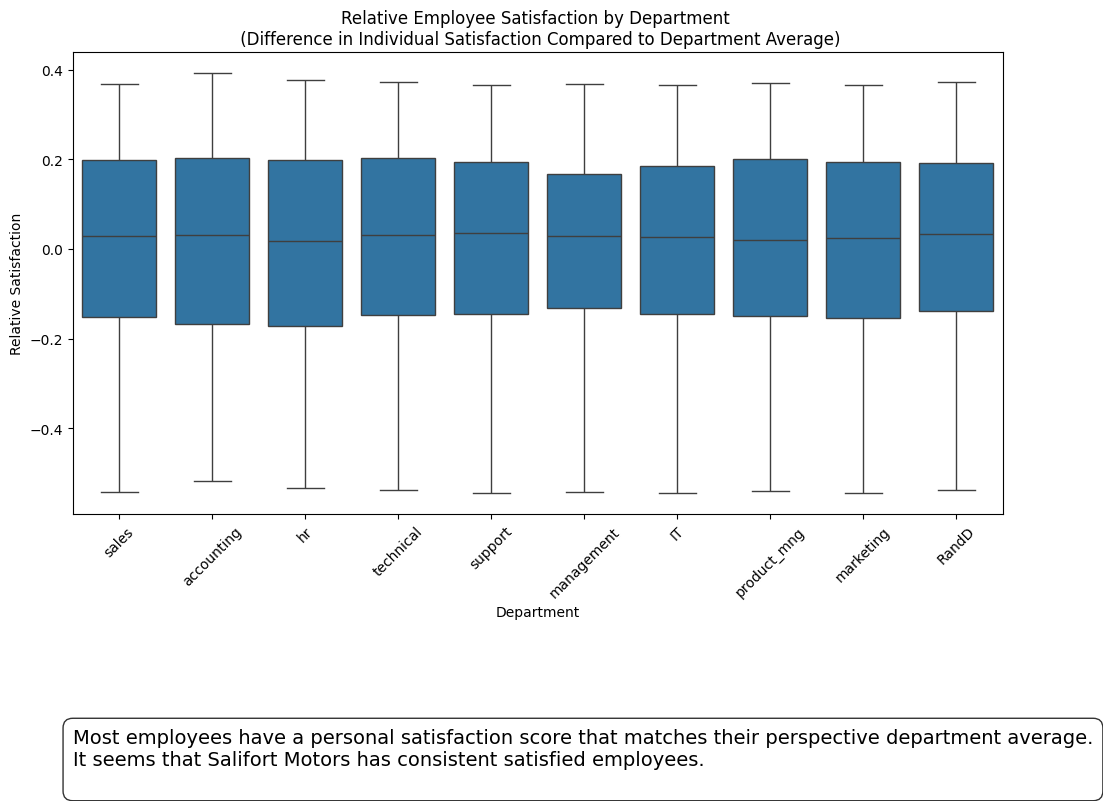

In [40]:
# Create Boxplot of Relative Satisfaction by department 

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='department', y='rel_satisfaction')
plt.xticks(rotation=45)
plt.title('Relative Employee Satisfaction by Department \n (Difference in Individual Satisfaction Compared to Department Average)')
plt.xlabel('Department')
plt.ylabel('Relative Satisfaction')

# Add explanatory footnotes using plt.text()
plt.text(
    -0.5,         # x position (move to the side)
    -1.2,        # y position (top of plot)
    'Most employees have a personal satisfaction score that matches their perspective department average.\n'
    'It seems that Salifort Motors has consistent satisfied employees.\n',
    fontsize=14,
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

plt.show()


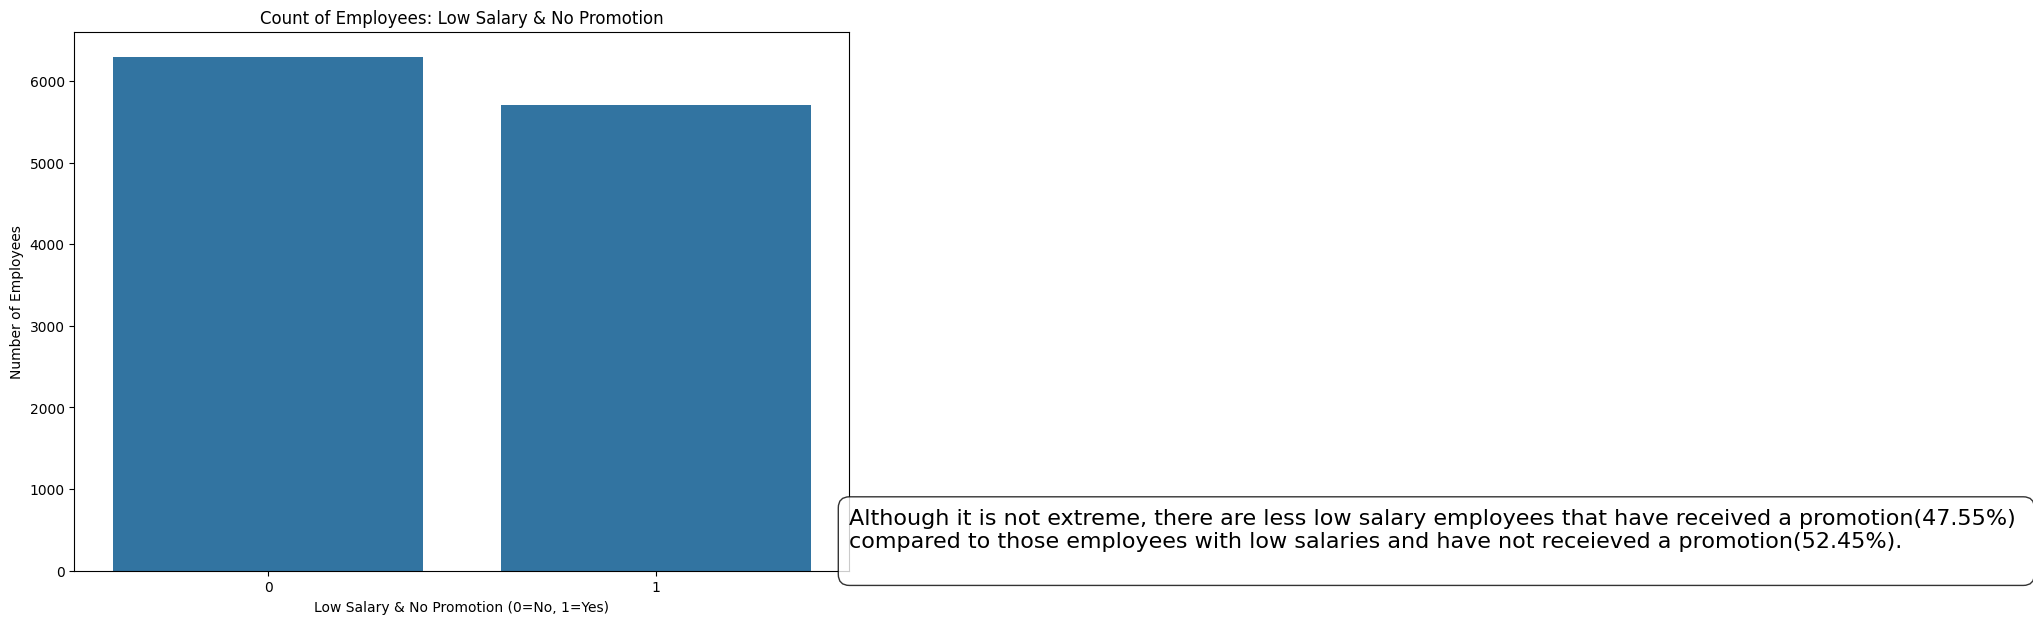

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x='low_salary_no_promotion', data=df)
plt.title('Count of Employees: Low Salary & No Promotion')
plt.xlabel('Low Salary & No Promotion (0=No, 1=Yes)')
plt.ylabel('Number of Employees')


# Add explanatory footnotes using plt.text()
plt.text(
    1.5,         # x position (move to the side)
    5,        # y position (top of plot)
    'Although it is not extreme, there are less low salary employees that have received a promotion(47.55%) \n'
    'compared to those employees with low salaries and have not receieved a promotion(52.45%).\n',
    fontsize=16,
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5')
)

plt.show()


In [43]:
df['low_salary_no_promotion'].value_counts(normalize = True) * 100

low_salary_no_promotion
0    52.447669
1    47.552331
Name: proportion, dtype: float64

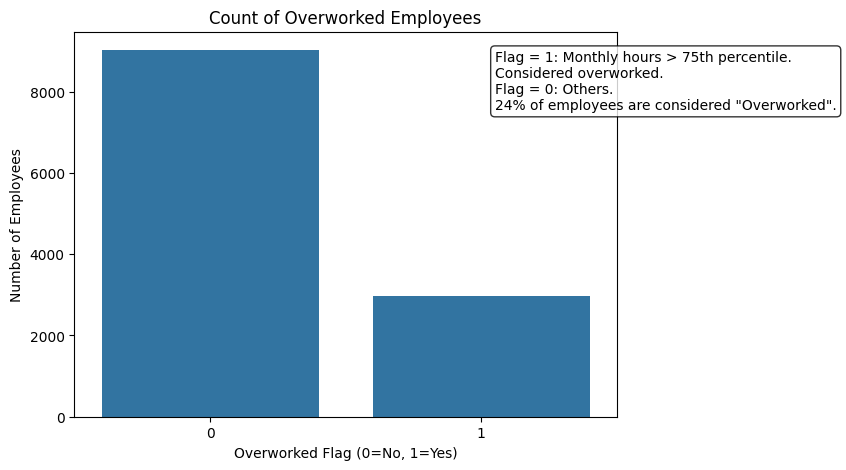

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(x='overworked', data=df)
plt.title('Count of Overworked Employees')
plt.xlabel('Overworked Flag (0=No, 1=Yes)')
plt.ylabel('Number of Employees')

plt.text(
    1.05,                                     # right of the second bar
    df['overworked'].value_counts().max(),    # top of tallest bar
    'Flag = 1: Monthly hours > 75th percentile.\n'
    'Considered overworked.\n'
    'Flag = 0: Others.\n'
    '24% of employees are considered "Overworked".',
    fontsize=10,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round')
)

plt.show()


In [45]:
df['overworked'].value_counts(normalize = True) * 100

overworked
0    75.256442
1    24.743558
Name: proportion, dtype: float64

In [46]:
df.describe()

,satisfaction_level,eval_score,total_projects,monthly_avg_hours,years_in_company,work_accident,left_company,promotion,satisfaction_eval_diff,yearly_project_rate,rel_satisfaction,low_salary_no_promotion,overworked
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,1.199100e+04,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,-0.087024,1.252174,-2.370253e-18,0.475523,0.247436
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.280586,0.512238,2.409946e-01,0.499421,0.431540
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,-0.890000,0.200000,-5.448215e-01,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,-0.230000,1.000000,-1.448215e-01,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,-0.070000,1.250000,2.865082e-02,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.100000,1.500000,1.951785e-01,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,0.620000,3.500000,3.920612e-01,1.000000,1.000000


### Insights

What insights can you gather from the plots you created to visualize the data?

A. Insights

- Despite the various unique factors pertaining to each employee, most people inidivduals that were surveyed are still with the company; (83.4%)
- The Average satisfaction rate is 62%
- The most satisfied group of employees are the ones working an avg of 200 hours per month; 50 per week. 
- With the exception of HR and Support departments, the avg tenure for each department is 3-4 years.
- Evaluation scores across each department is even
- Evalution score in individuals that left the company have a wider variety versus those who are still working witht Salifort Motors. This might be wroth looking into. Low eval score can lead to disciplinary actions and even getting fired. On the other hand, high eval scores can be indicative of individuals getting promotions from outside the original employer. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [53]:
pip install --upgrade scikit-learn joblib

     |████████████████████████████████| 24.8 MB 49.1 MB/s            
     |████████████████████████████████| 302 kB 89.6 MB/s            
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [47]:

# Model Selection: Logistic Regression and then XGBoost 

# Feature Engineering: 
# import pandas as pd
# Example DataFrame
# df = pd.read_csv('your_data.csv')


#instantiate and fit the model

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# List of columns to one-hot encode
categorical_cols = ['department', 'salary', 'hours_bin', 'tenure_bin']
                    
# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(['left_company', 'total_projects','monthly_avg_hours',], axis=1)

y = df_encoded['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y , stratify = y, test_size=0.25, random_state=21)



# Calculate scale_pos_weight for imbalance (neg/pos ratio)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Instantiate classifier
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight, # Important for class imbalance
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]


/Users/macbook/Projects/data-science/Salifort Motors Attrition Project/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [10:34:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
import joblib
joblib.dump(model, '../models/xgb_salifort_model.pkl')
print("ok XGBoost Model saved!")

ok XGBoost Model saved!


In [56]:
joblib.dump(y_pred, '../models/salifort_y_pred.pkl')
print("ok y_pred saved!")


ok y_pred saved!


In [57]:
joblib.dump(y_pred_prob, '../models/salifort_y_pred_prob.pkl')
print("ok y_pred_prob saved!")


ok y_pred_prob saved!


In [58]:
joblib.dump(X_train.columns.tolist(), '../models/salifort_feature_names.pkl')
print("ok feature names saved!")

ok feature names saved!


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, normalize = 'true')*100)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.95      0.93      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998

ROC AUC: 0.9767939759036144
Confusion Matrix:
 [[2474   26]
 [  37  461]]
Confusion Matrix:
 [[98.96        1.04      ]
 [ 7.42971888 92.57028112]]


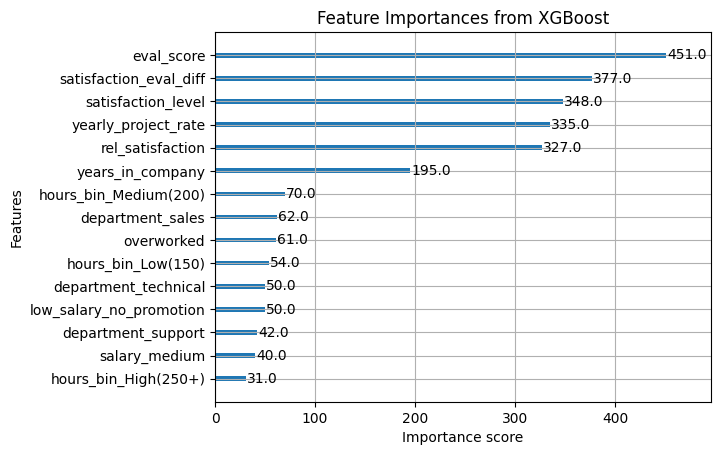

In [50]:


xgb.plot_importance(model, max_num_features=15)
plt.title("Feature Importances from XGBoost")
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}
gs = GridSearchCV(xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42), param_grid, scoring='roc_auc', cv=3)
gs.fit(X_train, y_train)
print("Best Parameters:", gs.best_params_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [52]:
import numpy as np
threshold = 0.6  # Example
y_pred_adj = (y_pred_prob > threshold).astype(int)
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.95      0.93      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Our team did not notice anything unusual per se, but we observed that our initial logistic regression model was not effective at properly identifying true positives and true negatives. As a result, we constructed a second model: a classification Extreme Gradient Boosting (XGBoost) decision tree.

2. Our Team decided to use the following variables: satisfaction level, eval score, total projects, monthly avg hours, years in company, work accident, left company, promotion, department, salary, hours_bin, satisfaction eval difference, yearly project rate, tenure bin, relative satisfaction, low salary no promotion group. overworked. 
- why? because they are all unique factors that encompass the Salifort Motors employee experience. 

3. Our final model does not need to meet any statistical assumptions. Our model is robust enought to handle various data distributions. 

4. Our data was inspected, cleaned and engineered to maximize model efficiency. Additionally, XGBoost Decision Trees are robust enough to handle outliers abnd it also doesn't have strict distributional or statistical assumptions. 

5. Our team was forced to improve the initial model by having to choose a different model all together in which we hypothesized would work better for our type of dataframe. Our final model was created using a XGBoost Decision Tree Classifier

6. Information and instructions given to my team by stakeholders and business partners. 

7. No ethical mal practice has been performed by the AGE Solutions Team. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###
 # Done above 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Great scores of 90% + for recall, precision and f-1 score in properly predicting an employee leaving the company. Our model also classifies data points correctly 98% of the time. The ROC AUC is 0.93 , which indicates that our model distinguishes very well between the 2 classes at various classification threslholds. 

2. recommendations: 
-focus on the positive aspects of employee experience to create systems to support and continue the positive experience. Ex: satisfaction level per employee is closely similar to their evaluation score, 83% of employees remain in the company, employees last an average of 3-4 years, etc. 
-Conversely, Salifort should also address the negative aspects discovered in the data. High amount of employees with low salaries and no promotions, overworked employees, unable to keep an employee due past 6 years. 

3. Maybe have my manager ask shareholders to conduct surveys with questions that are prepared to better understand employees and their needs/converns. Additionally, we can take the model a step further by trying to find the best hyperparameters for the model for more customization and efficiency

4. yes, as described above. New information might allow us to uncover patterns we're not yet aware of. 

5. Predicting whether or not an employee will leave the company or not is more complex than we initially thought. There isnt a linear or straightforward way of looking at the different factors to be able to predict employee attrition. Additionally:
-24% of employees are overworked. Satisfaction is highest amongst employees that work an average of 200 hours a week. 
-Average employees tenure at Salifort is about 3-5 years.
-Most employees have a personal satisfaction score that matches their perspective department average.
-It seems that Salifort Motors has consistent satisfied employees.
-Most employees have evaluation and satisfaction scores that are closely aligned.
-Although it is not extreme, there are less low salary employees that have received a promotion(47.55%) compared to those employees with low salaries and have not received a promotion(52.45%).
-Average eval score is about 72% and Satisfaction level is about 62% 
-Evaluation score by Employment Status: 
-Salifort Employee: average eval score is 71% 
-Former Salifort Employee: average of 72%
-Relative satisfaction score to averag department average was the most important feature. Eval Score was the 2nd most important. 3rd most important is satisfaction evaluation different. 4th most important is yearly_project rate. 5th is satisfaction level and then years in company as 6th most important. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

- XGBoost Decision tree Classifier model was the best model created by AGE Analytics
- Our teams recommendation is to implement this model to their current employees in some sort of platform that'll help indicate whether the employee is at high risk of leaving the company, and our team can dig further into the specific factors and how they can improve the metrics. 

- Visuals will be provided on report along with a full final report. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.